### 589 Machine Learning
# Assignment 2: Regression

**Group Members** -  
Brinda M  
Shubham Shetty  
Adarsh Kolya  

## Preface

### Import Statements

In [330]:
import numpy as np
import sklearn as sk
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, mean_absolute_error 
import pandas as pd
import matplotlib.pyplot as plt
import math

### Load Data

In [331]:
all_data = np.load("data.npz")
big_data = np.load("big_data.npz")

In [332]:
# Initialising for data.npz

# 3d training inputs
X_trn = all_data["X_trn"] 

# 1d training outputs
y_trn = all_data["y_trn"] 

# Test data inputs
X_val = all_data["X_val"] 

# Test data outputs
y_val = all_data["y_val"] 

In [333]:
# Initialising for big_data.npz

# 3d training inputs
X_big_trn = big_data["X_trn"] 

# 1d training outputs
y_big_trn = big_data["y_trn"] 

# Test data inputs
X_big_val = big_data["X_val"] 

# Test data outputs
y_big_val = big_data["y_val"] 

### Common Functions

In [334]:
# Euclidean Distance
def euc_dist(p1, p2, n):
    tot = 0
    for i in range(n):
        tot += (p1[i] - p2[i])**2
    return math.sqrt(tot)

In [335]:
# Loss Functions

# Mean Squared Error
def sq_error(a,b):
    n = len(a)
    err = 0
    for i in range(n):
        err += (a[i] - b[i])**2
    return err/n

# Mean Absolute Error
def abs_error(a,b):
    n = len(a)
    err = 0
    for i in range(n):
        err += abs(a[i] - b[i])
    return err/n

## Answer 1

In [336]:
# KNN Regression
def KNN_reg_predict(X_trn, y_trn, x, K):
    
    # Algorithm - 
    # 1. Calculate distance of x from each element of training data
    # 2. Find K closest elements
    # 3. Take average of y for closest elements as final prediction
    
    # Calculating euclidean distance for each element
    dist_vector = []
    for X in X_trn:
        dist_vector.append(euc_dist(X, x, 3))
    
    # Sorting by distance to find closest neighbours
    dist_vector2 = list(enumerate(dist_vector))
    dist_sorted = sorted(dist_vector2, key=lambda x:x[1])
    
    # Taking average to return final prediction
    y_new=0
    for i in range(K):
        y_new += y_trn[dist_sorted[i][0]]/K
    return y_new

## Answer 2

In [337]:
# MSE for KNN Regression
def KNN_reg_sq_error(X_trn, y_trn, X_val, y_val, K):
    eval_sq_error = []
    for i in range(1, K+1):
        prediction_trn = [KNN_reg_predict(X_trn, y_trn, j, i) for j in X_trn]
        prediction_tst = [KNN_reg_predict(X_trn, y_trn, j, i) for j in X_val]
        eval_sq_error.append([(i), sq_error(prediction_trn, y_trn), sq_error(prediction_tst,y_val)])
    df = pd.DataFrame(np.array(eval_sq_error),columns=['K', 'Training Data Error', 'Test Data Error'])
    return(df)

      K  Training Data Error  Test Data Error
0   1.0             0.000000         0.031462
1   2.0             0.008033         0.022590
2   3.0             0.011284         0.020367
3   4.0             0.013460         0.020312
4   5.0             0.014874         0.020941
5   6.0             0.014836         0.021199
6   7.0             0.015653         0.021181
7   8.0             0.015776         0.021703
8   9.0             0.017731         0.022148
9  10.0             0.018331         0.022652


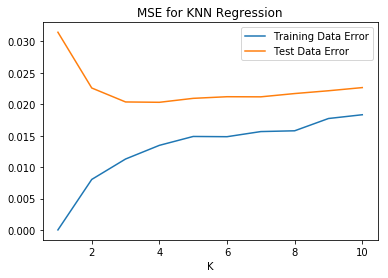

In [338]:
df = KNN_reg_sq_error(X_trn, y_trn, X_val, y_val, 10)
print(df)
df.plot(x="K", title="MSE for KNN Regression");

In [339]:
# MAE for KNN Regression
def KNN_reg_abs_error(X_trn, y_trn, X_val, y_val, K):
    eval_abs_error = []
    for i in range(1, K+1):
        prediction_trn = [KNN_reg_predict(X_trn, y_trn, j, i) for j in X_trn]
        prediction_tst = [KNN_reg_predict(X_trn, y_trn, j, i) for j in X_val]
        eval_abs_error.append([int(i), abs_error(prediction_trn, y_trn), abs_error(prediction_tst,y_val)])
    df = pd.DataFrame(np.array(eval_abs_error),columns=['K', 'Training Data Error', 'Test Data Error'])
    return(df)

      K  Training Data Error  Test Data Error
0   1.0             0.000000         0.142356
1   2.0             0.069524         0.121296
2   3.0             0.087810         0.113677
3   4.0             0.093670         0.114556
4   5.0             0.096531         0.114927
5   6.0             0.098717         0.114976
6   7.0             0.100032         0.115389
7   8.0             0.099904         0.117003
8   9.0             0.109744         0.117753
9  10.0             0.110578         0.119928


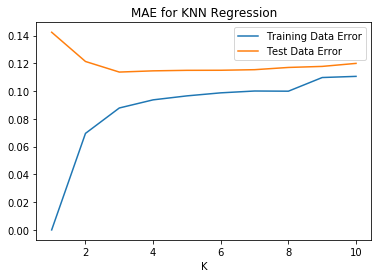

In [340]:
df = KNN_reg_abs_error(X_trn, y_trn, X_val, y_val, 10)
print(df)
df.plot(x="K", title="MAE for KNN Regression");

## Answer 3

In [341]:
# Linear Ridge Regression
def linear_reg_predict(x, w):
    y = np.dot(x, w)
    return y

## Answer 4

In [342]:
# Training Ridge Regression Model
def linear_reg_train(X_trn, y_trn, l):
    xt = X_trn.transpose()
    xtx = np.matmul(xt, X_trn)
    xty = np.matmul(xt, y_trn)
    li = l*np.identity(X_trn.shape[1])
    w = np.linalg.solve(xtx+li, xty)
    return w

## Answer 5

In [343]:
# MSE for Linear Ridge Regression
def linear_reg_sq_error(X_trn, y_trn, X_val, y_val):
    l = [0, 0.001, 0.01, 0.1, 1, 10]
    eval_sq_error = []
    for i in l:
        linear_reg_trn = linear_reg_predict(X_trn, linear_reg_train(X_trn, y_trn, i))
        linear_reg_tst = linear_reg_predict(X_val, linear_reg_train(X_trn, y_trn, i))
        eval_sq_error.append([i, sq_error(linear_reg_trn, y_trn), sq_error(linear_reg_tst,y_val)])
    df = pd.DataFrame(np.array(eval_sq_error),columns=['Lambda (l)', 'Training Data Error', 'Test Data Error'])
    return(df)

   Lambda (l)  Training Data Error  Test Data Error
0       0.000             0.010242         0.010909
1       0.001             0.010242         0.010910
2       0.010             0.010243         0.010917
3       0.100             0.010263         0.011005
4       1.000             0.011953         0.013187
5      10.000             0.058293         0.059082


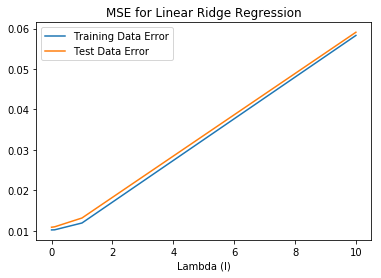

In [344]:
df = linear_reg_sq_error(X_trn, y_trn, X_val, y_val)
print(df)
df.plot(x="Lambda (l)", title="MSE for Linear Ridge Regression");

In [345]:
# MAE for Linear Ridge Regression
def linear_reg_abs_error(X_trn, y_trn, X_val, y_val):
    l = [0, 0.001, 0.01, 0.1, 1, 10]
    eval_abs_error = []
    for i in l:
        linear_reg_trn = linear_reg_predict(X_trn, linear_reg_train(X_trn, y_trn, i))
        linear_reg_tst = linear_reg_predict(X_val, linear_reg_train(X_trn, y_trn, i))
        eval_abs_error.append([i, abs_error(linear_reg_trn, y_trn), abs_error(linear_reg_tst,y_val)])
    df = pd.DataFrame(np.array(eval_abs_error),columns=['Lambda (l)', 'Training Data Error', 'Test Data Error'])
    return(df)

   Lambda (l)  Training Data Error  Test Data Error
0       0.000             0.080886         0.082917
1       0.001             0.080884         0.082920
2       0.010             0.080871         0.082945
3       0.100             0.080776         0.083253
4       1.000             0.087064         0.090350
5      10.000             0.197639         0.198164


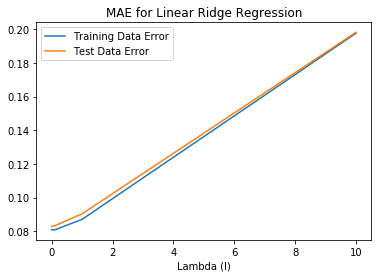

In [346]:
df = linear_reg_abs_error(X_trn, y_trn, X_val, y_val)
print(df)
df.plot(x="Lambda (l)", title="MAE for Linear Ridge Regression");

## Answer 6

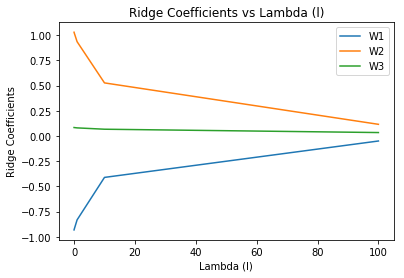

In [347]:
l = [0,0.001, 0.01, 0.1,1, 10, 100]
a = []
for i in l:
    a.append([i, linear_reg_train(X_trn, y_trn, i)[0], linear_reg_train(X_trn, y_trn, i)[1], 
              linear_reg_train(X_trn, y_trn, i)[2]])
df = pd.DataFrame(np.array(a),columns=['Lambda (l)', 'W1', 'W2', 'W3'])
df.plot(x='Lambda (l)', title="Ridge Coefficients vs Lambda (l)").set(ylabel="Ridge Coefficients");

## Answer 7

In [348]:
# Predicting Value via Regression Stump
def reg_stump_predict(x, dim, thresh, c_left, c_right):
    y = []
    for i in x:
        if i[dim] <= thresh:
            y.append(c_left)
        else:
            y.append(c_right)
    return y

## Answer 8

In [349]:
# Training Regression Stump
def reg_stump_train(X_trn, y_trn):
    
    # Algorithm - 
    # 1. For each dimension, sort the data.
    # 2. Create potential split points as average of adjacent elements in sorted data.
    # 3. Define regions with points on either side of split (R1 if x_i < s else R2).
    # 4. Find optimal constants c1 & c2
    # 5. Calculate error for each split.
    # 6. Return split values for which minimum error is obtained across the dimensions.
    
    # Get number of dimensions in input
    D = X_trn.shape[1]
    
    # Initialise error as infinity
    err = float("inf")
    
    for j in range(D):
        s = []
        x = X_trn[:,j]
        z = np.sort(x)
        
        # Get potential splits
        for i in range(len(z)-1):
            s.append(0.5*(z[i]+z[i+1]))    
        
        for split in s:
            y1, y2 = 0, 0
            r1, r2 = [], []
            # Divide all points into two regions
            for xn in range(len(x)):
                if x[xn] < split:
                    r1.append(xn)
                    y1 += y_trn[xn]
                else:
                    r2.append(xn)
                    y2 += y_trn[xn]
            
            # Get constant values for both regions
            c1 = y1/len(r1)
            c2 = y2/len(r2)
            
            # Calculate error 
            err2 = sum([(y_trn[i] - c1)**2 for i in r1]) + sum([(y_trn[i] - c2)**2 for i in r2])
            
            # Replace terms if error is minimum
            if(err2<err):
                err = err2
                dim = j
                thresh = split
                c_left = c1
                c_right = c2
    
    return dim, thresh, c_left, c_right

## Answer 9

In [350]:
# MSE & MAE for Regression Stump
def reg_stump_sq_error(X_trn, y_trn, X_val, y_val):
    eval_error = []
    dim, thresh, c_left, c_right = reg_stump_train(X_trn, y_trn)
    pred_trn = reg_stump_predict(X_trn, dim, thresh, c_left, c_right)
    pred_tst = reg_stump_predict(X_val, dim, thresh, c_left, c_right)
    eval_error.append([sq_error(pred_trn, y_trn), sq_error(pred_tst,y_val)])
    eval_error.append([abs_error(pred_trn, y_trn), abs_error(pred_tst,y_val)])
    df = pd.DataFrame(np.array(eval_error),columns=['Training Data Error', 'Test Data Error'],index=['MSE','MAE'])
    return df

In [351]:
reg_stump_sq_error(X_trn, y_trn, X_val, y_val)

,Training Data Error,Test Data Error
MSE,0.097324,0.123254
MAE,0.255508,0.288270


## Answer 10

In [352]:
# KNN Regression for real data
def KNN_reg_real(X_big_trn, y_big_trn, X_big_val, y_big_val):
    K = [1, 2, 5, 10, 20, 50]
    sq_errs = []
    for i in K:
        neigh = KNeighborsRegressor(n_neighbors=i)
        neigh.fit(X_big_trn, y_big_trn)
        sq_errs.append([i, mean_squared_error(y_big_trn, neigh.predict(X_big_trn)), mean_squared_error(y_big_val, neigh.predict(X_big_val))])
    df = pd.DataFrame(np.array(sq_errs),columns=['K', 'Training Data Error', 'Test Data Error'])
    return df

      K  Training Data Error  Test Data Error
0   1.0             0.000000         0.063055
1   2.0             0.013516         0.051343
2   5.0             0.029755         0.047411
3  10.0             0.043787         0.054627
4  20.0             0.059547         0.067552
5  50.0             0.083329         0.096843


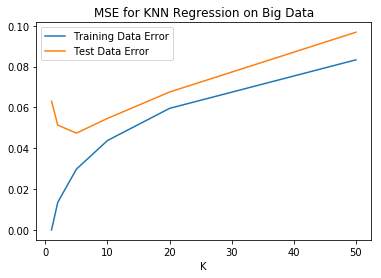

In [353]:
df = KNN_reg_real(X_big_trn, y_big_trn, X_big_val, y_big_val)
print(df)
df.plot(x="K", title="MSE for KNN Regression on Big Data");

## Answer 11

In [354]:
# Regression Tree for real data
def reg_tree_real(X_big_trn, y_big_trn, X_big_val, y_big_val):
    max_depth = 5
    sq_errs = []
    
    # Fit model
    for i in range(1,max_depth+1):
        tree1 = DecisionTreeRegressor(max_depth=i)
        tree1.fit(X_big_trn, y_big_trn)
        # Predict
        y_pred_trn = tree1.predict(X_big_trn)
        y_pred_tst = tree1.predict(X_big_val)
        # Errors
        sq_errs.append([i, mean_squared_error(y_big_trn, y_pred_trn), mean_squared_error(y_big_val, y_pred_tst)])
    df = pd.DataFrame(np.array(sq_errs),columns=['Depth', 'Training Data Error', 'Test Data Error'])
    return df

   Depth  Training Data Error  Test Data Error
0    1.0             0.226337         0.225094
1    2.0             0.117116         0.121711
2    3.0             0.075729         0.080604
3    4.0             0.056466         0.061122
4    5.0             0.042719         0.048591


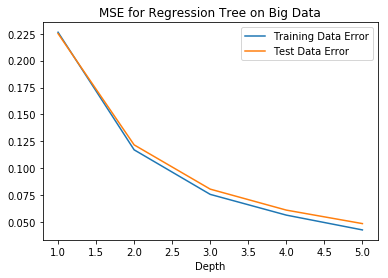

In [355]:
df = reg_tree_real(X_big_trn, y_big_trn, X_big_val, y_big_val)
print(df)
df.plot(x="Depth", title="MSE for Regression Tree on Big Data");

## Answer 12

In [356]:
# Linear Ridge Regression for real data
def linear_ridge_reg_real(X_big_trn, y_big_trn, X_big_val, y_big_val):
    l = [0, 1, 10, 100, 1000, 10000]
    eval_sq_error = []
    for i in l:
        ridge_reg = linear_model.Ridge(alpha=i)
        ridge_reg.fit(X_big_trn, y_big_trn)
        linear_reg_trn = linear_reg_predict(X_big_trn, ridge_reg.coef_)
        linear_reg_tst = linear_reg_predict(X_big_val, ridge_reg.coef_)
        eval_sq_error.append([i, mean_squared_error(linear_reg_trn, y_big_trn), mean_squared_error(linear_reg_tst,y_big_val)])
    df = pd.DataFrame(np.array(eval_sq_error),columns=['Lambda (l)', 'Training Data Error', 'Test Data Error'])
    return(df)

   Lambda (l)  Training Data Error  Test Data Error
0         0.0             0.294976         0.278076
1         1.0             0.294976         0.278082
2        10.0             0.294981         0.278144
3       100.0             0.295388         0.279136
4      1000.0             0.313595         0.303158
5     10000.0             0.522598         0.514033


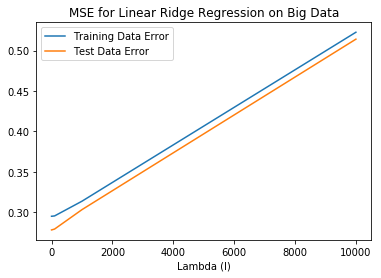

In [357]:
df = linear_ridge_reg_real(X_big_trn, y_big_trn, X_big_val, y_big_val)
print(df)
df.plot(x="Lambda (l)", title="MSE for Linear Ridge Regression on Big Data");

## Answer 13

In [358]:
# Linear Lasso Regression for real data
def linear_lasso_reg_real(X_big_trn, y_big_trn, X_big_val, y_big_val):
    l = [0, 0.1, 1, 10, 100, 1000]
    N = X_big_trn.shape[0]
    eval_sq_error = []
    for i in l:
        lasso_reg = linear_model.Lasso(alpha=i/(2*N))
        lasso_reg.fit(X_big_trn, y_big_trn)
        linear_reg_trn = lasso_reg.predict(X_big_trn)
        linear_reg_tst = lasso_reg.predict(X_big_val)
        eval_sq_error.append([i, mean_squared_error(linear_reg_trn, y_big_trn), mean_squared_error(linear_reg_tst,y_big_val)])
    df = pd.DataFrame(np.array(eval_sq_error),columns=['Lambda (l)', 'Training Data Error', 'Test Data Error'])
    return(df)

/Users/shubhamshetty/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  
/Users/shubhamshetty/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:477: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  positive)
/Users/shubhamshetty/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


   Lambda (l)  Training Data Error  Test Data Error
0         0.0             0.294967         0.278102
1         0.1             0.294967         0.278104
2         1.0             0.294968         0.278118
3        10.0             0.294998         0.278288
4       100.0             0.296185         0.280887
5      1000.0             0.342903         0.338830


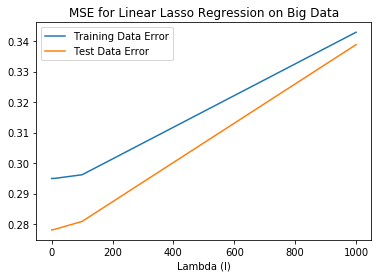

In [359]:
df = linear_lasso_reg_real(X_big_trn, y_big_trn, X_big_val, y_big_val)
print(df)
df.plot(x="Lambda (l)", title="MSE for Linear Lasso Regression on Big Data");